In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
sns.set_theme(style="white")

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/df_stats_cotes.csv')

In [ ]:
#Pre-processing
df.rename(columns={'FTR': 'Match_Result'}, inplace = 'True')
df['Match_Result'].replace(to_replace=['H', 'D', 'A'],value=['Home', 'Draw', 'Away'], inplace = True)

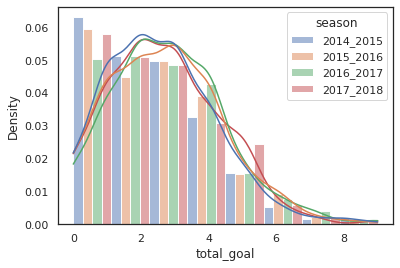

In [ ]:
# DataViz 1: 
# Densité de probabilité de la variable "Nombre de but par match" (Estimation par noyau)
# On retrouve une loi de Poisson conforme à l'article ci- dessous (fiche présentationn du projet). 
# La probabilité qu'un but soit marqué n'est pas impacté par les évenements passé.
# https://towardsdatascience.com/o-jogo-bonito-predicting-the-premier-league-with-a-random-model-1b02fa3a7e5a
# ce résultat est important pour les prédictions du nombre de but / match ou les prédictions du score.
df['total_goal'] = df['FTHG'] + df['FTAG']
sns.histplot(data=df, x='total_goal', bins=8, hue='season', kde=True, stat='density', multiple='dodge'); 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


Text(0.5, 1.0, 'Home-field advantage')

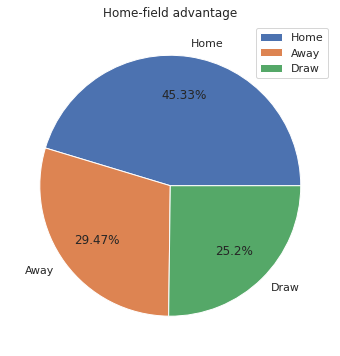

In [ ]:
# DataViz 2:
# Camembert représentant la proportion de match remportés par l'équipe Home, Away ainsi que les matchs nuls
# Le fait de jouer à domicile impacte nettement le résultat.
x = df['Match_Result'].value_counts().reset_index().drop(columns='index')
plt.figure(figsize = (6, 6))
plt.pie(x, labels = ['Home', 'Away', 'Draw'],
           autopct = lambda x: str(round(x, 2)) + '%',
           pctdistance = 0.7, labeldistance = 1.1) 
plt.legend();
plt.title('Home-field advantage')


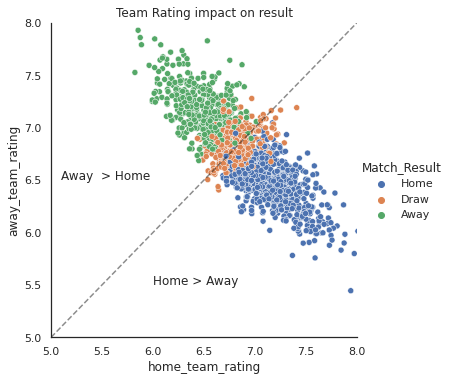

In [ ]:
# DataViz 3: Impact de la note de l'équipe sur le résultat du match. On voit que l'équipe ayant une note supérieur a une forte chance de gagner,
# qu'elle joue à domicile ou non. Cet indicateur, a priori non disponible lors de la prédiction pourrait être approximé à partir des notes des 
# matchs précédents. Une moyenne pondérée de sorte à se rapprocher le plus des notes des matchs à prédire serait une variable importante pour 
# alimenter le modèle choisi.
g = sns.relplot(x='home_team_rating', y='away_team_rating', hue = 'Match_Result', data=df);
plt.plot([5,8], [5,8], '--k', alpha = 0.5)
plt.text(5.1, 6.5,'Away  > Home') 
plt.text(6, 5.5,'Home > Away') 
plt.title('Team Rating impact on result')
plt.axis([5, 8, 5, 8]);

Text(0.5, 0.98, 'Total scoring impact')

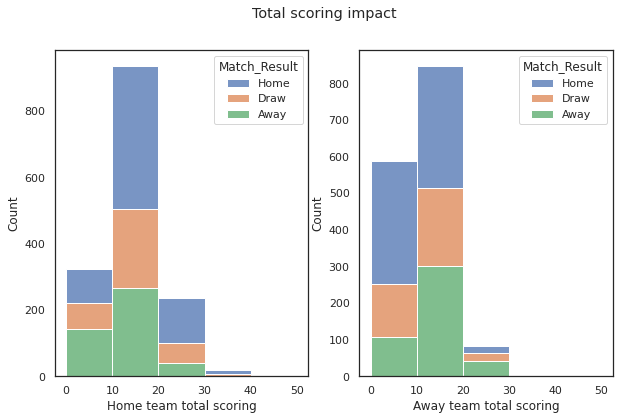

In [ ]:
# DataViz 4: Parmis les indicateurs dont on dispose. Le nombre de tirs cadrés fait parti des indicateurs les plus correlés au résultat du match.
# (v. heatmap)
# Pour les équipes jouant à domicile, au plus l'équipe tire (se crée des occasions), au plus la proportion de victoire (partie bleue) est grande
# en comparaison avec les défaites.
# Pour les équipes jouant à l'exterieur cette tendance est vérifiée mais seulement un nombre de tir important 
# permet d'avoir une proportion de victoire plus grande que celle de défaite.
fig = plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.histplot(data=df, x='home_total_scoring_att', bins=[0, 10, 20, 30, 40, 50], hue='Match_Result', multiple = 'stack');
plt.xlabel('Home team total scoring')
plt.subplot(1,2,2)
plt.xlabel('Away team total scoring')
sns.histplot(data=df, x='away_total_scoring_att', bins=[0, 10, 20, 30, 40, 50], hue='Match_Result', multiple = 'stack');
plt.suptitle('Total scoring impact')


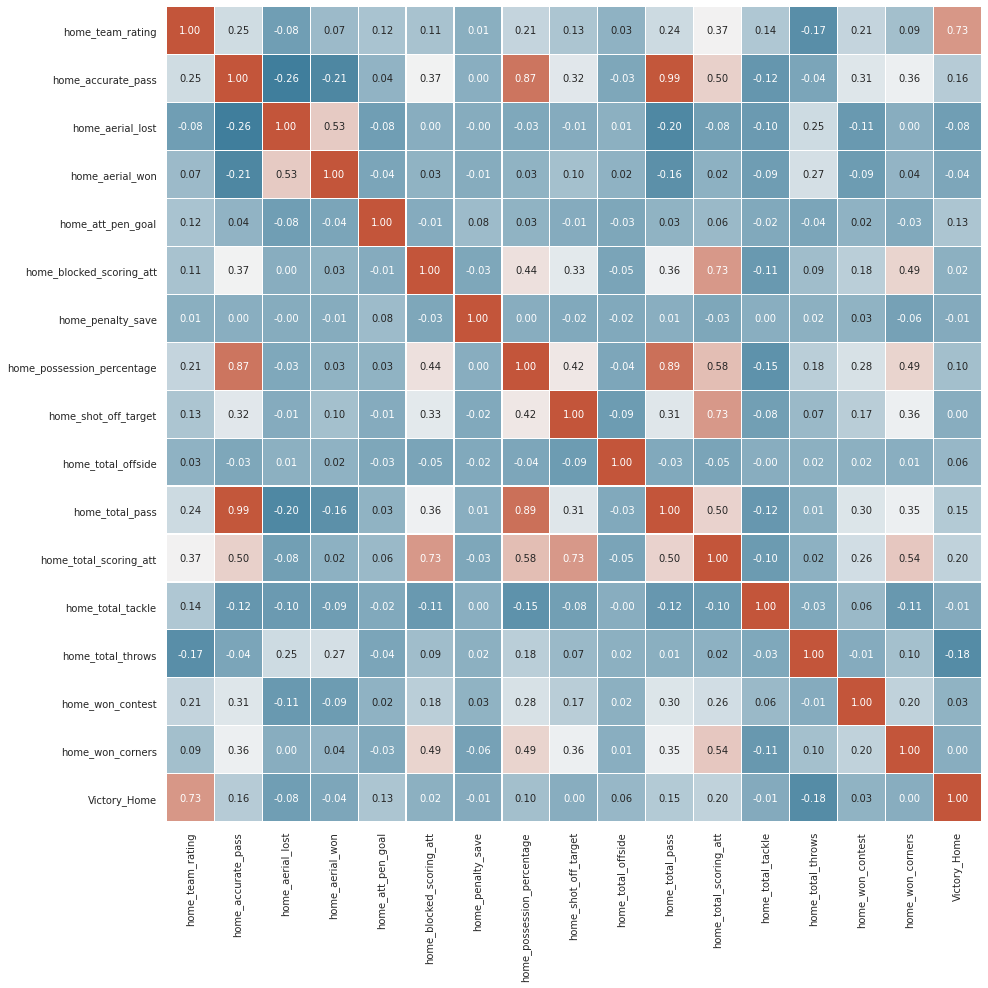

In [ ]:
# DataViz 5: Heatmap des statistiques équipe. On regarde les correlations éventuelles de ces variables
# avec la variable cible. Les heatmaps sont présentées pour les victoires à domicile 'Home' et des visiteurs
# 'Away'
df_heatmap = df.join(pd.get_dummies(df['Match_Result'], prefix ='Victory'))
df_heatmap = df_heatmap.drop(['Match_Result'], axis=1)
# Selection des variables d'interets - Victoire à Domicile
df_home = df_heatmap[[
'home_team_rating',
'home_accurate_pass',
'home_aerial_lost',
'home_aerial_won',
'home_att_pen_goal',
'home_blocked_scoring_att',
'home_penalty_save',
'home_possession_percentage',
'home_shot_off_target',
'home_total_offside',
'home_total_pass',
'home_total_scoring_att',
'home_total_tackle',
'home_total_throws',
'home_won_contest',
'home_won_corners',
 'Victory_Home'
 ]]
cor_home = df_home.corr()

fig, ax = plt.subplots(figsize=(15,15))
   
heatmap = sns.heatmap(cor_home, annot=True, fmt=".2f", annot_kws={"size":10}, linewidths=0.1, ax=ax, cmap = sns.diverging_palette(230, 20, as_cmap=True), cbar=False, square=True)

heatmap.set_xticklabels(heatmap.get_xmajorticklabels(), fontsize = 10)
heatmap.set_yticklabels(heatmap.get_xmajorticklabels(), fontsize = 10)

plt.show()

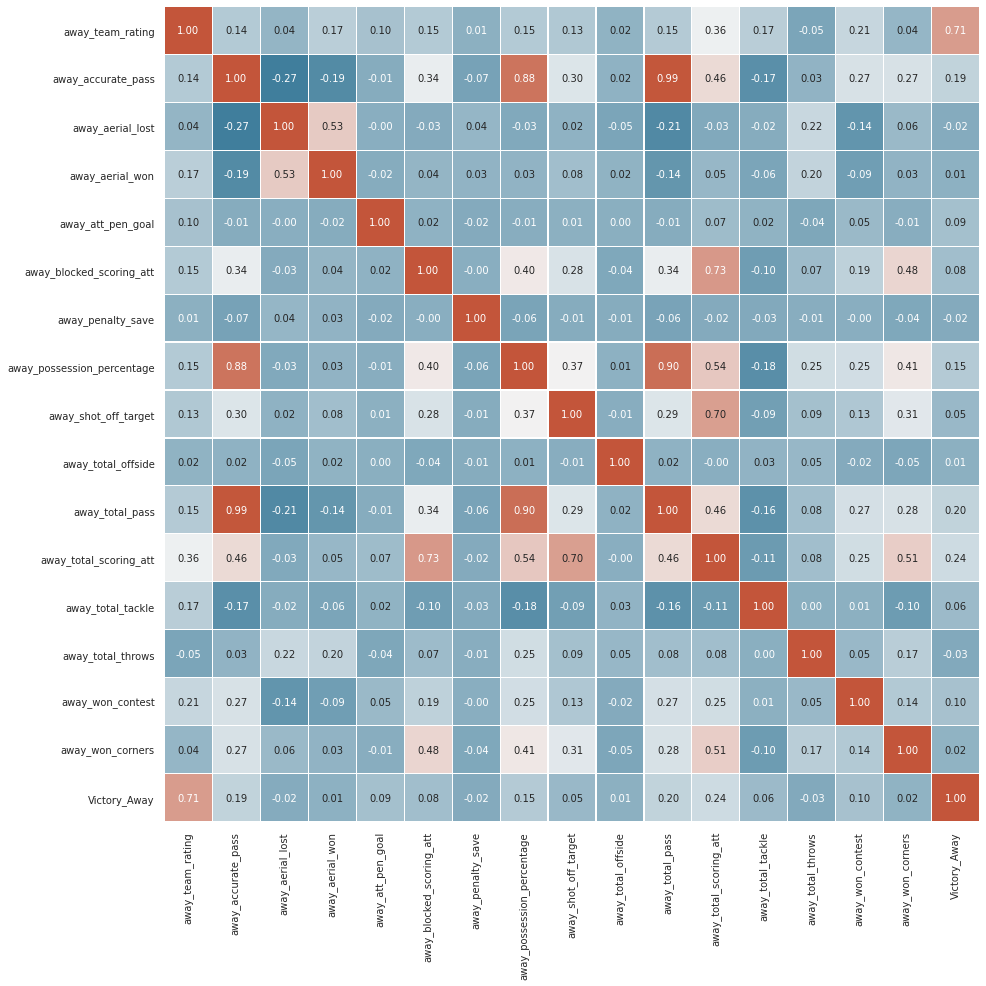

In [ ]:
df_away = df_heatmap[[
'away_team_rating',
'away_accurate_pass',
'away_aerial_lost',
'away_aerial_won',
'away_att_pen_goal',
'away_blocked_scoring_att',
'away_penalty_save',
'away_possession_percentage',
'away_shot_off_target',
'away_total_offside',
'away_total_pass',
'away_total_scoring_att',
'away_total_tackle',
'away_total_throws',
'away_won_contest',
'away_won_corners',
'Victory_Away'
]]
cor_away = df_away.corr()

fig, ax = plt.subplots(figsize=(15,15))
   
heatmap = sns.heatmap(cor_away, annot=True, fmt=".2f", annot_kws={"size":10}, linewidths=0.1, ax=ax, cmap = sns.diverging_palette(230, 20, as_cmap=True), cbar=False, square=True)

heatmap.set_xticklabels(heatmap.get_xmajorticklabels(), fontsize = 10)
heatmap.set_yticklabels(heatmap.get_xmajorticklabels(), fontsize = 10)

plt.show()

In [ ]:
#Dataviz 6: Performance des predictions des Bookmakers et leurs faiblesses.
# On trace pour chaque bookmaker la proportion de bonne et mauvaise prédiction pour l'ensemble des 4 saisons.
# L'ensemble des bookmakers ont des résultats très comparables. La proportion de mauvaises prédiction est
# assez élevée mais reste inférieure aux bonne prédictions.

df_cotes = df[[
'date',            
'B365H',
'B365D',
'B365A',
'LBH',
'LBD',
'LBA',
'PSH',
'PSD',
'PSA',
'WHH',
'WHD',
'WHA',
'VCH',
'VCD',
'VCA',
'PSCH',
'PSCD',
'PSCA',
'Match_Result'
]]
def result(H,D,A,R):
  if (H<A) & (H<D):
    return 'Home'
  elif (A<H) & (A<D):
    return 'Away'
  elif (D<H) & (D<A):
    return 'Draw'
  # cas où cotes H et A sont égales, et inférieures à cote D
  # dans ce cas, si D non prédit, on met 'H' de manière aléatoire ici pour que la cote soit considérée erronée
  elif (H==A):
    return R if not 'Draw' else 'Home'

cotes = [['B365H','B365D','B365A',],['LBH','LBD','LBA'],['PSH','PSD','PSA'],['WHH','WHD','WHA'],['VCH','VCD','VCA'],['PSCH','PSCD','PSCA']]
for cote in cotes:
  df_cotes[cote[0][:-1]] = df_cotes.apply(lambda row: result(row[cote[0]], row[cote[1]], row[cote[2]], row['Match_Result']), axis=1)
df_cotes = df_cotes.drop(['B365H', 'B365D', 'B365A', 'LBH', 'LBD', 'LBA', 'PSH', 'PSD',
       'PSA', 'WHH', 'WHD', 'WHA', 'VCH', 'VCD', 'VCA', 'PSCH', 'PSCD', 'PSCA'], axis=1)
cotes_gen = ['B365', 'LB', 'PS', 'WH', 'VC', 'PSC']

def res_cote(Match_Result,cote):
  return 'Prédiction Correcte' if cote == Match_Result else 'Prediction Fausse'

for cote in cotes_gen:
  df_cotes[f"{cote}_bookmaker"] = df_cotes.apply(lambda row: res_cote(row['Match_Result'],row[cote]), axis=1)

df_cotes_v1 = df_cotes.drop(['date','Match_Result','B365', 'LB', 'PS', 'WH', 'VC', 'PSC'],axis=1)
df_plot = df_cotes_v1.reset_index().melt('index', var_name='cols',  value_name='vals')



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


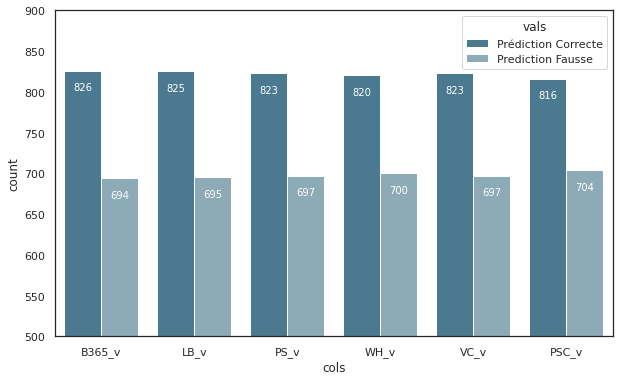

In [ ]:
sns.set_theme(style='white')
sns.set_palette(sns.diverging_palette(230, 20))
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.countplot(x="cols", hue="vals", data=df_plot)
plt.ylim([500, 900]);
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=10)
plt.show()

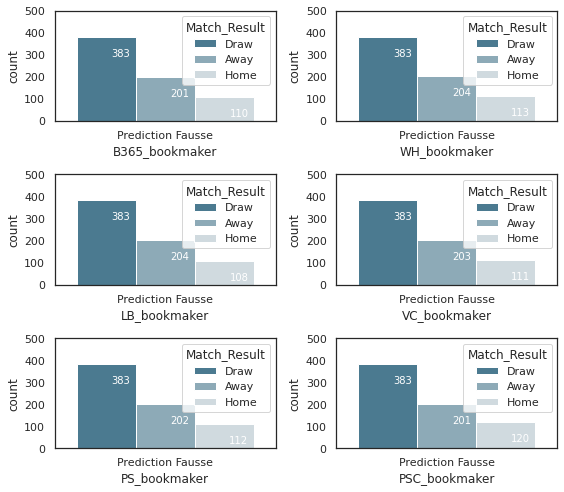

In [ ]:
# DataViz 7: Quels sont les matchs qui posent le plus de soucis aux bookmakers ?
# On regarde la proportions de resultats 'Home', 'Away', 'Draw' parmis les matchs dont la prédiction
# des bookmakers s'est averée fausse. 
# Les victoires de l'équipe "visiteur" puis la prédiction des matchs nuls sont les faiblesses identifiées. 

df_cotes_v2 = df_cotes.drop(['date','B365', 'LB', 'PS', 'WH', 'VC', 'PSC'],axis=1)
df_cotes_v2.head()
cols_cotes = ['B365_bookmaker', 'LB_bookmaker', 'PS_bookmaker', 'WH_bookmaker', 'VC_bookmaker', 'PSC_bookmaker']
f = plt.figure(figsize=(8, 7))
gs = f.add_gridspec(3, 2)
pos=0

for bm in cols_cotes:
  row = 0 if pos <=2 else 1 
  col = pos if pos <=2 else pos-3
  df_non_predit = df_cotes_v2[df_cotes_v2[bm] == 'Prediction Fausse']
  ax = f.add_subplot(gs[col, row])
  ax = sns.countplot(x=bm, hue="Match_Result", data=df_non_predit)
  plt.ylim([0, 500]);
  for p in ax.patches:
      ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=10)
  pos += 1

f.tight_layout()